In [3]:
function get_interpolation(grid, vals)
  function f(x)
        grid[1] <= x <= grid[end] || throw(DomainError()) # throw an error if input x is out of domain
    i = searchsortedlast(grid, x) # find the first index i in grid where grid[i] >= x
    if i == length(grid)
      return vals[end]
    else
      return vals[i] + (vals[i+1] - vals[i]) / (grid[i+1] - grid[i]) * (x - grid[i])
    end
  end
  return f
end

println("高階関数として実装")

高階関数として実装


In [4]:
immutable LinearInterpolation
  grid
  vals
end

function Base.call(a::LinearInterpolation, x)
  function f(x)
    i = searchsortedlast(a.grid, x)
    a.grid[1] <= x <= a.grid[end] || throw(DomainError()) # throw an error if input x is out of domain

    if i == length(a.grid)
      return a.vals[end]
    else
      return a.vals[i] + (a.vals[i+1] - a.vals[i]) / (a.grid[i+1] - a.grid[i]) * (x - a.grid[i])
    end
  end
  return map(f, x)
end
println("immutableとして実装")

immutableとして実装


In [22]:
println("これを用いてlogを線形補間してみる")
cgrid = linspace(1, 10, 5)
cvals = log(cgrid)
println("cgridとして[1, 10]を5分割した配列をとり, logを適用した値をcvalに格納")

a = LinearInterpolation(cgrid, cvals)
println("この線形補間された関数とlogをplotしてみる")

これを用いてlogを線形補間してみる
cgridとして[1, 10]を5分割した配列をとり, logを適用した値をcvalに格納
この線形補間された関数とlogをplotしてみる


55


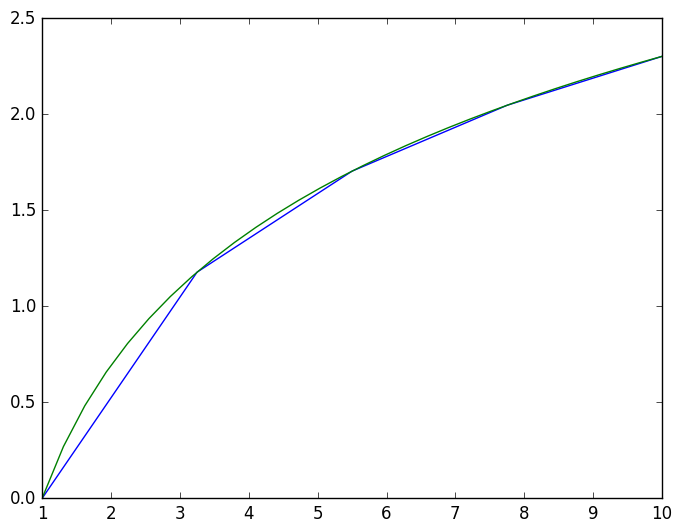

In [23]:
using PyPlot

plot(cgrid, cvals)
fgrid = linspace(1, 10, 30)
plot(fgrid, log(fgrid))
legend()